In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

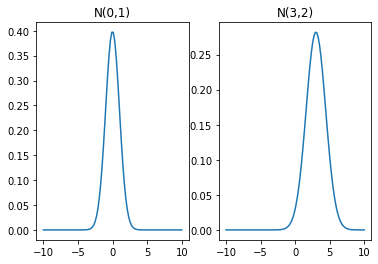

In [2]:
# Defining the subplots
fig, (ax1, ax2) = plt.subplots(1,2)
mu = 0
variance = 1
sigma = math.sqrt(variance)
# Generating random variable x
x = np.linspace(-10, 10, 100)
ax1.set_title('N(0,1)')
# Creating and plotting the gaussian distribution
ax1.plot(x, stats.norm.pdf(x, mu, sigma))
mu = 3
variance = 2
sigma = math.sqrt(variance)
x = np.linspace(-10, 10, 100)
ax2.set_title('N(3,2)')
# Creating and plotting the gaussian distribution
ax2.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

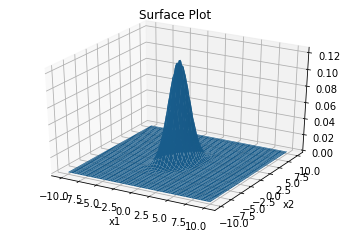

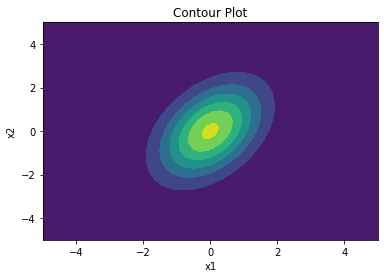

In [3]:
# Creating random variables Xi's
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

# Creating 2D vector fields
x1,x2 =np.meshgrid(x1,x2)

# Packing Xi's into a single 3D array
x = np.empty(x1.shape + (2,))
x[:, :, 0] = x1
x[:, :, 1] = x2

# Mean matrix
mu = np.array([0,0])

# Covariance matrix
sigma = np.array([[1,0.6],[0.6,2]])

# Calculating the multivariate gaussian output
y = stats.multivariate_normal(mean=mu,cov=sigma)
fig = plt.figure()

# Creating a surface plot and projected 3D plot under it
ax1 = fig.gca(projection='3d')
ax1.set_title('Surface Plot')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

# Plotting the PDF of the Gaussian distribution
ax1.plot_surface(x1, x2, y.pdf(x))

fig2,ax2 = plt.subplots(1,1)
# Creating a contour plot and projected 3D plot under it
ax2.set_title('Contour Plot')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
plt.ylim((-5,5))
plt.xlim((-5,5))

# Plotting the PDF of the Gaussian distribution
ax2.contourf(x1, x2, y.pdf(x))

plt.show()

In [4]:
# Importing the dataset
dataset = pd.read_csv('iris.data')

# Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset.iloc[:,-1:].values

# Changing the shape of y
y = np.ravel(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 82)

# Feature Scaling to bring the variable in a single scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Naive Bayes Classification to the Training set with linear kernel
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)


#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
print(y_compare[:150,:])

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]

print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor']
[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor'